# **Crimes in India Analysis**

> Crime in India has been recorded since the British Raj, with comprehensive statistics now compiled annually by the National Crime Records Bureau(NCRB), under the Ministry of Home Affairs(MHA).

> As of **2018**, a total of **50,74,634** cognizable crimes comprising **31,32,954** Indian Penal Code (IPC) crimes and **19,41,680** Special & Local Laws (SLL) crimes were registered nationwide. Despite showing a **1.3%** annual increase in the registration of cases (**50,07,044** cases), the crime rate per 100,000 population has slightly come down from **388.6** in 2017 to **383.5** in 2018

> This notebook comprises of various facts and infographics about different types of crimes that have taken place in India since 2001 (2001-2018)

In [103]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
import cufflinks as cf
import seaborn as sns
cf.go_offline()

In [6]:
victims = pd.read_csv('../input/crime-in-india/20_Victims_of_rape.csv')
police_hr = pd.read_csv('../input/crime-in-india/35_Human_rights_violation_by_police.csv')
auto_theft = pd.read_csv('../input/crime-in-india/30_Auto_theft.csv')
prop_theft = pd.read_csv('../input/crime-in-india/10_Property_stolen_and_recovered.csv')
fraud = pd.read_csv("../input/crime-in-india/31_Serious_fraud.csv")
kidnap = pd.read_csv("../input/crime-in-india/39_Specific_purpose_of_kidnapping_and_abduction.csv")
murder = pd.read_csv("../input/crime-in-india/32_Murder_victim_age_sex.csv")

## Rape cases <a class="anchor" id="chapter1"></a>

**Rape** is the **fourth** most common crime against women in India. Laws against rape come under the **Indian Penal Code 376**. Incest rape cases are registered under the condition where the offender is known to the victim. 

### Incest rape cases reported from 2001 to 2010 <a class="anchor" id="section_1_1"></a>

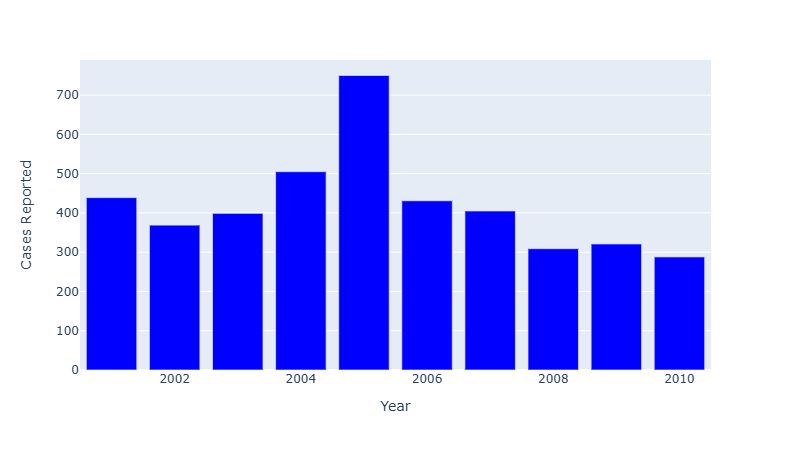

In [7]:
inc_victims = victims[victims['Subgroup']=='Victims of Incest Rape']

g = pd.DataFrame(inc_victims.groupby(['Year'])['Rape_Cases_Reported'].sum().reset_index())
g.columns = ['Year','Cases Reported']

fig = px.bar(g,x='Year',y='Cases Reported',color_discrete_sequence=['blue'])
fig.show()

- In **2005**, around **750** cases were reported which is the **highest** number of that decade. 
- The year **2010** recorded the **lowest** number of cases i.e **288**.

### State/UT wise incest rape cases reported from 2001 to 2010 <a class="anchor" id="section_1_2"></a>

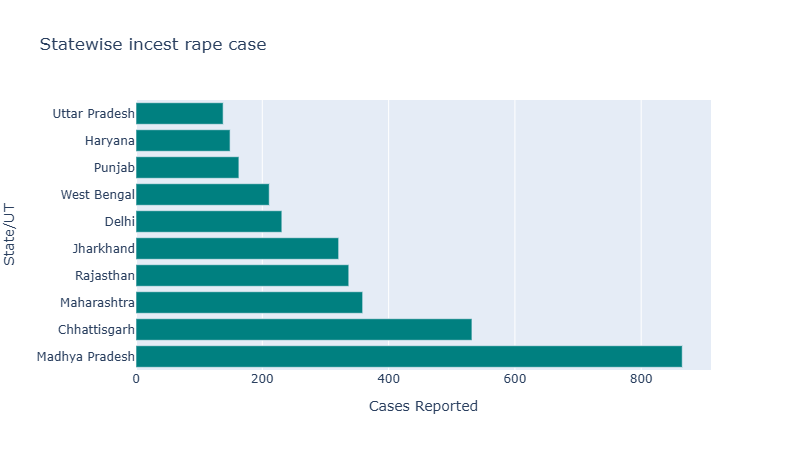

In [25]:
g1 = pd.DataFrame(inc_victims.groupby(['Area_Name'])['Rape_Cases_Reported'].sum().reset_index())
g1.columns = ['State/UT','Cases Reported']
g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

g1 = g1.sort_values('Cases Reported', ascending=False)

fig = px.bar(g1[:10], x="Cases Reported", y="State/UT", title="Statewise incest rape case", orientation='h', color_discrete_sequence=['#008080'])
fig.show()

- Top 3 states having highest number of cases - **Madhya Pradhesh, Chhatisgarh, Rajasthan**
- Top 3 states having lowest number of cases - **Tripura, Manipur, Goa**

### Distribution of age groups of victims <a class="anchor" id="section_1_3"></a>

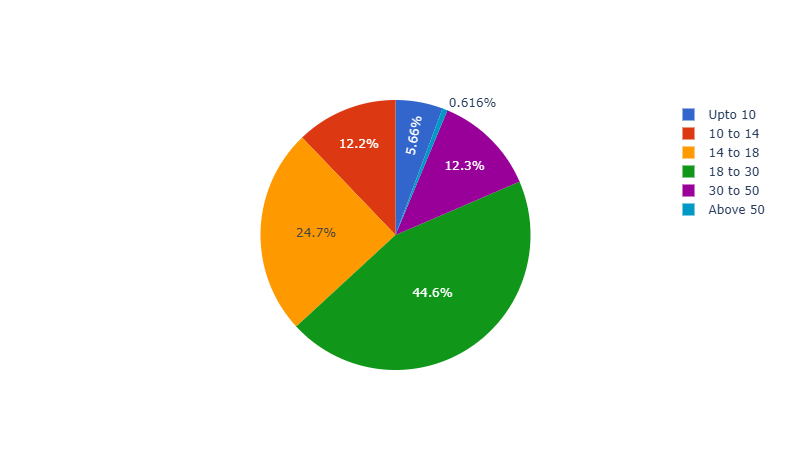

In [5]:
above_50 = inc_victims['Victims_Above_50_Yrs'].sum()
ten_to_14 = inc_victims['Victims_Between_10-14_Yrs'].sum()
fourteen_to_18 = inc_victims['Victims_Between_14-18_Yrs'].sum()
eighteen_to_30 = inc_victims['Victims_Between_18-30_Yrs'].sum()
thirty_to_50 = inc_victims['Victims_Between_30-50_Yrs'].sum()
upto_10 = inc_victims['Victims_Upto_10_Yrs'].sum()

age_grp = ['Upto 10','10 to 14','14 to 18','18 to 30','30 to 50','Above 50']
age_group_vals = [upto_10,ten_to_14,fourteen_to_18,eighteen_to_30,thirty_to_50,above_50]

fig = go.Figure(data=[go.Pie(labels=age_grp, values=age_group_vals,sort=False,
                            marker=dict(colors=px.colors.qualitative.G10),textfont_size=12)])

fig.show()

- Women between the age group of **18-30** have been **most** affected
- Women between the age group **above 50** have been **least** affected

- In **2008**, highest number of cases were recorded - **506**
- The year **2006** recorded **least** number of cases i.e **58**

- **Maharashtra** has the most cases of vehicles stolen - over **103k**

### Property theft cases <a class="anchor" id="chapter4"></a>

### State/UT wise number of property stolen cases from 2001 to 2010 <a class="anchor" id="section_4_1"></a>

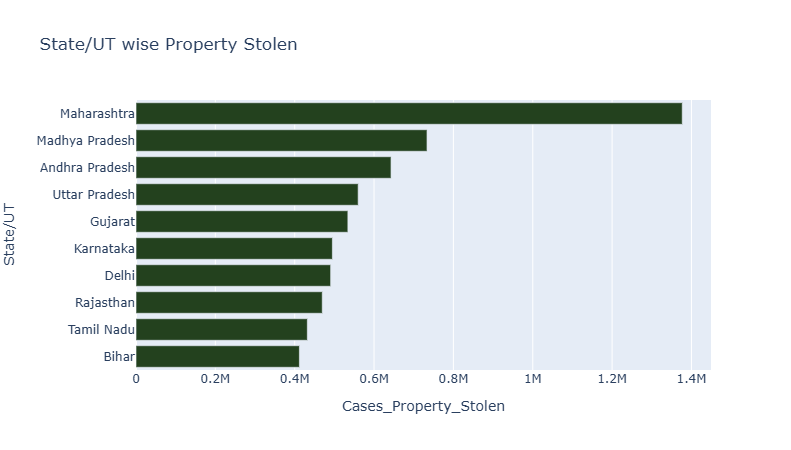

In [119]:
g7 = pd.DataFrame(prop_theft.groupby(['Area_Name'])['Cases_Property_Stolen'].sum().reset_index())
g7.columns = ['State/UT','Cases_Property_Stolen']
g7.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)
g7 = g7.sort_values('Cases_Property_Stolen', ascending=False)
fig = px.bar(g7[:10][::-1], x="Cases_Property_Stolen", y="State/UT", title="State/UT wise Property Stolen", orientation='h', color_discrete_sequence=['#23411e'])
fig.show()

### Types of property stolen cases <a class="anchor" id="section_4_2"></a>

**Cases have been registered under the following heads:**

1) Dacoity

2) Criminal Breach of Trust

3) Robbery

4) Burglary

5) Theft

6) Others

### Property stolen vs recovered <a class="anchor" id="section_4_3"></a>

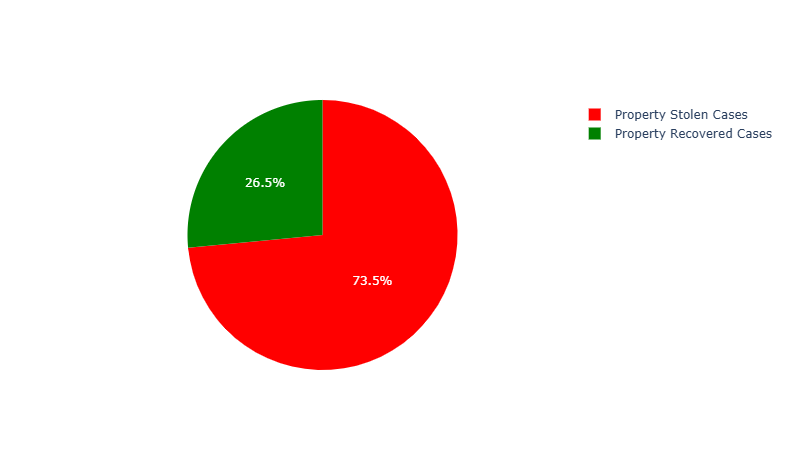

In [18]:
prop_theft_recovered = prop_theft['Cases_Property_Recovered'].sum()
prop_theft_stolen = prop_theft['Cases_Property_Stolen'].sum()

prop_group = ['Property Stolen Cases','Property Recovered Cases']
prop_vals = [prop_theft_stolen,prop_theft_recovered]

colors = ['red','green']

fig = go.Figure(data=[go.Pie(labels=prop_group, values=prop_vals,sort=False,
                            marker=dict(colors=colors),textfont_size=12)])

fig.show()

### Year-wise Value of Property Stolen and Recovered <a class="anchor" id="section_4_4"></a>

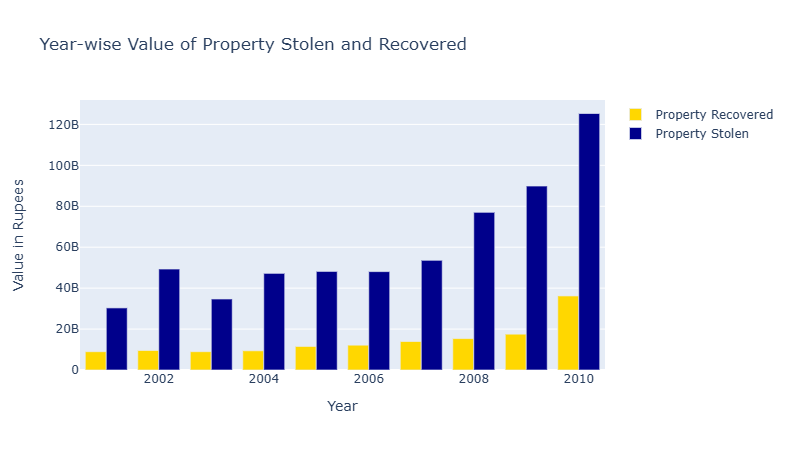

In [19]:
g9 = pd.DataFrame(prop_theft.groupby(['Year'])['Value_of_Property_Recovered','Value_of_Property_Stolen'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Property Recovered', x=year, y=g9['Value_of_Property_Recovered'],
           marker_color='gold'),
    go.Bar(name='Property Stolen', x=year, y=g9['Value_of_Property_Stolen'],
          marker_color='darkblue')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Value in Rupees',
                 title='Year-wise Value of Property Stolen and Recovered')
fig.show()

## Fraud Cases

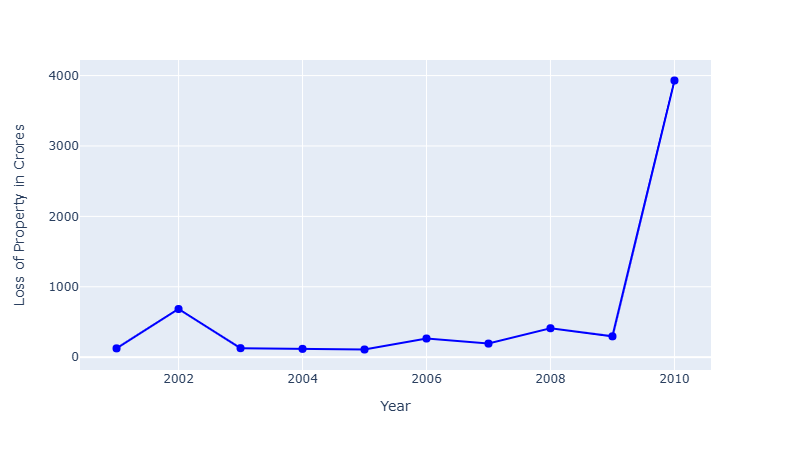

In [49]:
fraud['Loss_of_Property'] = fraud['Loss_of_Property_1_10_Crores'] + fraud['Loss_of_Property_10_25_Crores'] + fraud['Loss_of_Property_25_50_Crores']

g = pd.DataFrame(fraud.groupby(['Year'])['Loss_of_Property'].sum().reset_index())

g.columns = ['Year','Cases Reported']

fig = px.line(g,x='Year',y='Cases Reported',color_discrete_sequence=['blue'], labels={
    'Year': 'Year',
    'Cases Reported': 'Loss of Property in Crores'
})
# Add markers to highlight points
fig.update_traces(mode='lines+markers', marker=dict(size=8, color='blue'))
fig.show()

### State/UT wise Fraud Cases

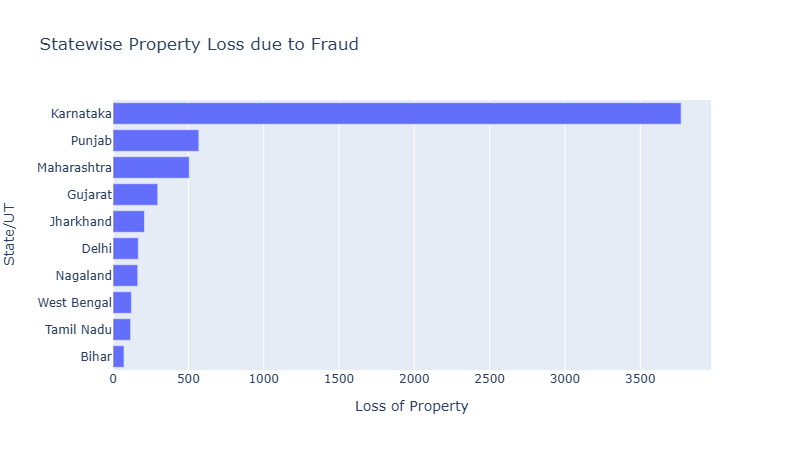

In [47]:
g1 = pd.DataFrame(fraud.groupby(['Area_Name'])['Loss_of_Property'].sum().reset_index())
g1.columns = ['State/UT','Loss of Property']
g1.replace(to_replace='Arunachal Pradesh',value='Arunanchal Pradesh',inplace=True)

g1 = g1.sort_values('Loss of Property', ascending=False)

fig = px.bar(g1[:10][::-1], x="Loss of Property", y="State/UT", title="Statewise Property Loss due to Fraud", orientation='h')

fig.show()

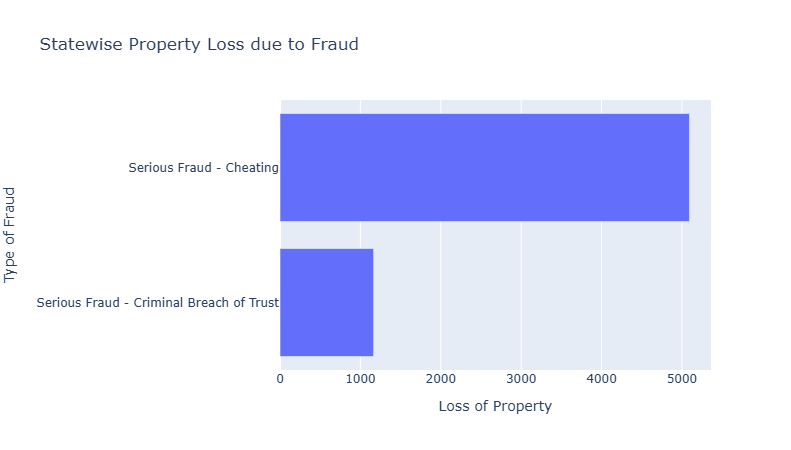

In [65]:
tof = pd.DataFrame(fraud.groupby('Group_Name')['Loss_of_Property'].sum().reset_index())
tof.columns = ['Group_Name','Loss of Property']

tof = tof.sort_values('Loss of Property', ascending=False)

fig = px.bar(tof[:10][::-1], x="Loss of Property", y="Group_Name", title="Statewise Property Loss due to Fraud", labels={
    'Group_Name': 'Type of Fraud'
})

fig.show()

## Murder Cases

### Yearwise Murder Cases

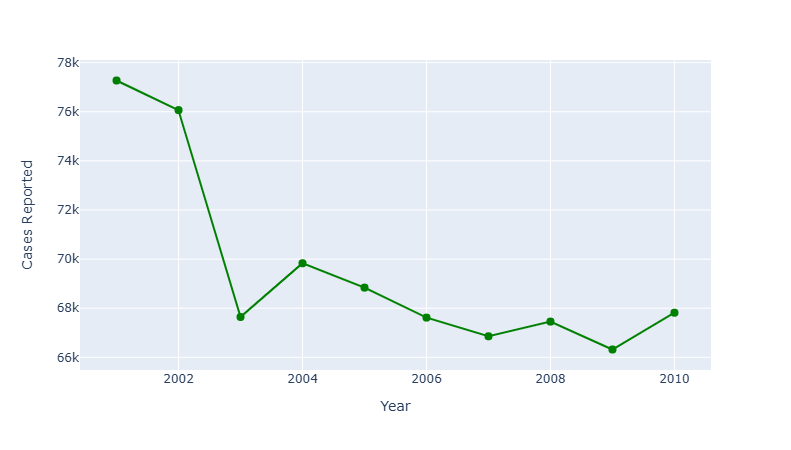

In [73]:
g = pd.DataFrame(murder.groupby(['Year'])['Victims_Total'].sum().reset_index())

g.columns = ['Year','Cases Reported']

fig = px.line(g,x='Year',y='Cases Reported',color_discrete_sequence=['green'])
# Add markers to highlight points
fig.update_traces(mode='lines+markers', marker=dict(size=8, color='green'))
fig.show()

### Statewise Murder Cases

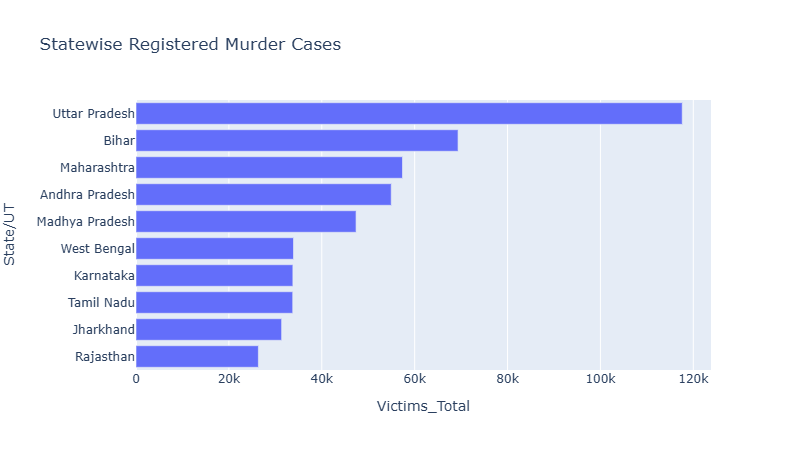

In [77]:
g1 = pd.DataFrame(murder.groupby(['Area_Name'])['Victims_Total'].sum().reset_index())
g1.columns = ['State/UT','Victims_Total']

g1 = g1.sort_values('Victims_Total', ascending=False)

fig = px.bar(g1[:10][::-1], x="Victims_Total", y="State/UT", title="Statewise Registered Murder Cases", orientation='h')

fig.show()

### Number of Victims above 50 compared with total victims

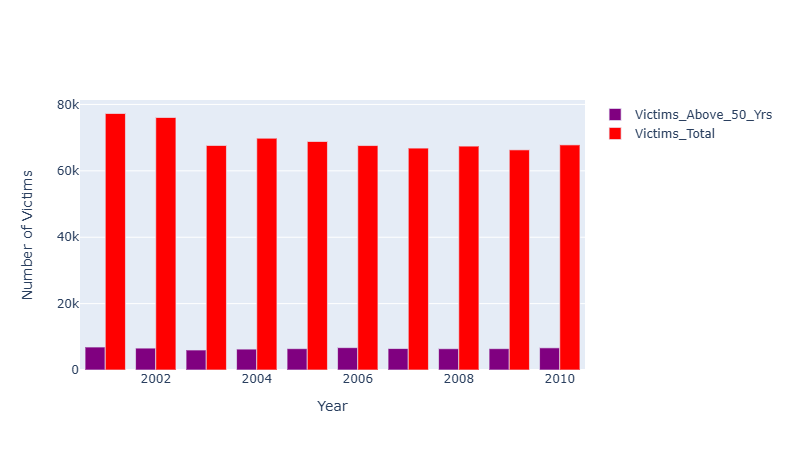

In [79]:
g4 = pd.DataFrame(murder.groupby(['Year'])['Victims_Above_50_Yrs','Victims_Total'].sum().reset_index())

year=['2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']

fig = go.Figure(data=[
    go.Bar(name='Victims_Above_50_Yrs', x=year, y=g4['Victims_Above_50_Yrs'],
           marker_color='purple'),
    go.Bar(name='Victims_Total', x=year, y=g4['Victims_Total'],
          marker_color='red')
])

fig.update_layout(barmode='group',xaxis_title='Year',yaxis_title='Number of Victims')
fig.show()

## Kidnapping

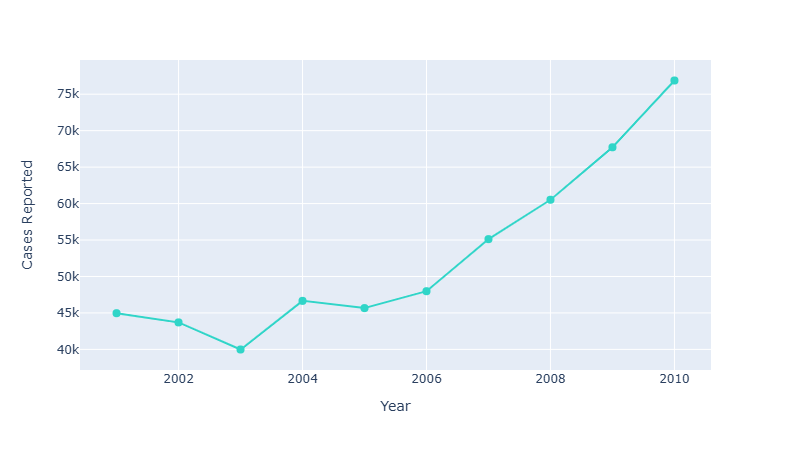

In [84]:
g = pd.DataFrame(kidnap.groupby(['Year'])['K_A_Cases_Reported'].sum().reset_index())

g.columns = ['Year','K_A_Cases_Reported']

fig = px.line(g,x='Year',y='K_A_Cases_Reported',color_discrete_sequence=['#30D5C8'], labels={
    'K_A_Cases_Reported': 'Cases Reported'
})
# Add markers to highlight points
fig.update_traces(mode='lines+markers', marker=dict(size=8, color='#30D5C8'))
fig.show()

### Statewise Cases

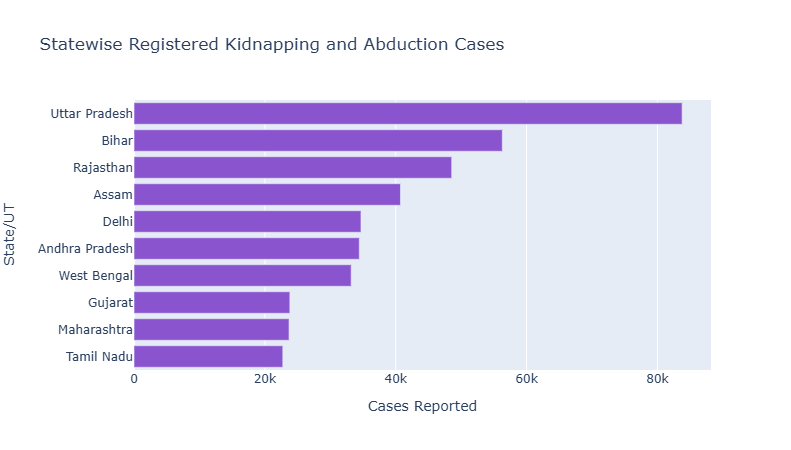

In [92]:
g1 = pd.DataFrame(kidnap.groupby(['Area_Name'])['K_A_Cases_Reported'].sum().reset_index())
g1.columns = ['State/UT','K_A_Cases_Reported']

g1 = g1.sort_values('K_A_Cases_Reported', ascending=False)

fig = px.bar(g1[:10][::-1], x="K_A_Cases_Reported", y="State/UT", title="Statewise Registered Kidnapping and Abduction Cases", orientation='h', color_discrete_sequence=['#8954CE'], labels={
    'K_A_Cases_Reported': 'Cases Reported'
})

fig.show()

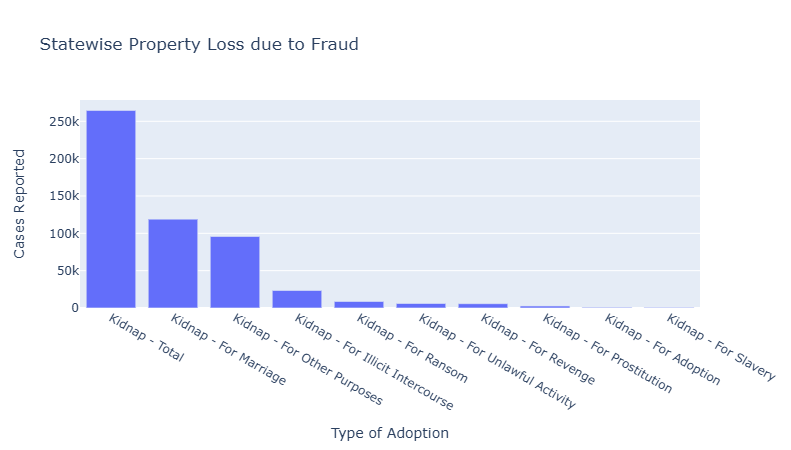

In [100]:
tof = pd.DataFrame(kidnap.groupby('Group_Name')['K_A_Cases_Reported'].sum().reset_index())
tof.columns = ['Group_Name','K_A_Cases_Reported']

tof = tof.sort_values('K_A_Cases_Reported', ascending=False)

fig = px.bar(tof[:10], x='Group_Name', y='K_A_Cases_Reported', title="Statewise Property Loss due to Fraud", labels={
    'Group_Name': 'Type of Adoption',
    'K_A_Cases_Reported': 'Cases Reported'
})

fig.show()